# Regression

### 1) Regression models

We use the california_housing data set

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [1]:
from sklearn import datasets
import pandas as pd, numpy as np, math

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [2]:
housing.target_names

['MedHouseVal']

Let us now split data for evaluation purposes

In [3]:
from sklearn.model_selection import train_test_split

X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print("train:",X_train.shape,"\ntest:",X_test.shape)

train: (14448, 8) 
test: (6192, 8)


**Classic linear regression models**

In [4]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print("intercept:",lr.intercept_)
print("coefficients:",lr.coef_)

intercept: -37.5063422002079
coefficients: [ 4.30148066e-01  9.14733959e-03 -9.46280265e-02  5.67201956e-01
 -4.26556293e-06 -4.00360525e-03 -4.30475904e-01 -4.42334906e-01]


In [6]:
from sklearn import metrics

pred_train_lr= lr.predict(X_train)
print("reference:\n",y_train[0:20],"\n\npredictions:\n",pred_train_lr[0:20])

reference:
 [1.143 0.754 1.287 0.815 1.228 2.275 1.094 1.25  0.723 1.938 2.905 0.731
 2.01  4.727 0.851 2.298 2.945 1.266 1.58  4.384] 

predictions:
 [1.46684622 1.00221756 1.44822569 1.07324835 1.32548257 2.64388554
 1.808963   1.94582622 1.07263716 2.63188889 2.54352473 0.49951625
 2.4649375  3.66704643 0.14847506 2.26214805 2.51135439 1.3442272
 1.70481704 3.37817858]


In [7]:
print("Training RMSE:",np.sqrt(metrics.mean_squared_error(y_train,pred_train_lr)))
print("Training R2:",metrics.r2_score(y_train, pred_train_lr))

Training RMSE: 0.7175122020184264
Training R2: 0.6109534632719813


In [8]:
pred_test_lr= lr.predict(X_test)
print("RMSE (no regularization):",np.sqrt(metrics.mean_squared_error(y_test,pred_test_lr))) 
print("R2 (no regularization):",metrics.r2_score(y_test, pred_test_lr))

RMSE (no regularization): 0.739948774053579
R2 (no regularization): 0.5944602625172059


In [9]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_test_rr= rr.predict(X_test)
print("RMSE (Ridge):",np.sqrt(metrics.mean_squared_error(y_test,pred_test_rr))) 
print("R2 (Ridge):",metrics.r2_score(y_test, pred_test_rr))

RMSE (Ridge): 0.7399488885097063
R2 (Ridge): 0.5944601370584901


In [10]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_test_lasso= model_lasso.predict(X_test)
print("RMSE (Lasso):",np.sqrt(metrics.mean_squared_error(y_test,pred_test_lasso))) 
print("R2 (Lasso):",metrics.r2_score(y_test, pred_test_lasso))

RMSE (Lasso): 0.7457805408296869
R2 (Lasso): 0.588042702401081


**Cross-validation** (identical to our previous notebook)

In [11]:
from sklearn.model_selection import cross_val_score
regressor = LinearRegression()
cross_val_score(regressor, X, y, cv=10)

array([0.48254494, 0.61416063, 0.42274892, 0.48178521, 0.55705986,
       0.5412919 , 0.47496038, 0.45844938, 0.48177943, 0.59528796])

### 2) Evaluation

Let us recover our linear model for residual analysis on the testing set

In [12]:
y_true, y_pred = y_test, pred_test_lr
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_true, y_pred)))
print("MAE:",metrics.mean_absolute_error(y_true, y_pred))
print("Train R2:",metrics.r2_score(y_true, y_pred))
print("Test R2:",metrics.r2_score(y_true, y_pred))

RMSE: 0.739948774053579
MAE: 0.5424799334532462
Train R2: 0.5944602625172059
Test R2: 0.5944602625172059


Let us recover our linear model for residual analysis on CV folds

In [13]:
regressor = LinearRegression()
print("MSE:",-np.mean(cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error')))
print("MAE:",-np.mean(cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_absolute_error')))
print("Max error:",-np.mean(cross_val_score(regressor, X, y, cv=10, scoring='max_error')))
print("Test R2:",np.mean(cross_val_score(regressor, X, y, cv=10, scoring='r2')))

MSE: 0.5509524296956638
MAE: 0.5445214393268031
Max error: 4.616528138757749
Test R2: 0.5110068610523769


In [14]:
metrics.r2_score(y_true, y_pred) #R2 on testing set

0.5944602625172059

### 3) Regression over mixed data

**Loading** case dataset

In [15]:
dataurl = 'https://raw.githubusercontent.com/buruzaemon/me-ml/master/ISLR/Data/Advertising.csv'
data = pd.read_csv(dataurl, index_col=0)
print("Number of instances:",data.shape)

#adding a binary attribute
data['Size'] = 'small'
mask_large = np.random.rand(len(data)) > 0.5
data.loc[mask_large, 'Size'] = 'large'

#adding a nominal attribute
nums = np.random.rand(len(data))
data['Area'] = 'rural'
data.loc[(nums > 0.33) & (nums < 0.66), 'Area'] = 'suburban'
data.loc[nums > 0.66, 'Area'] = 'urban'

data.head()

Number of instances: (200, 4)


,TV,Radio,Newspaper,Sales,Size,Area
1,230.1,37.8,69.2,22.1,large,urban
2,44.5,39.3,45.1,10.4,large,rural
3,17.2,45.9,69.3,9.3,small,urban
4,151.5,41.3,58.5,18.5,large,suburban
5,180.8,10.8,58.4,12.9,small,rural


**Visualizing** data (assuming *Sales* is the output variable)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

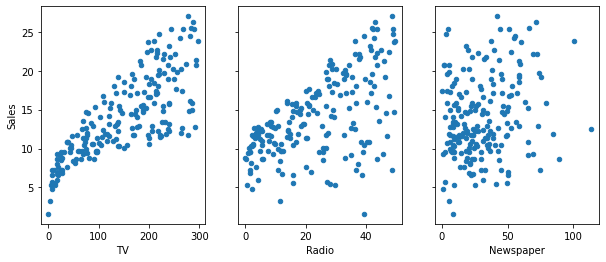

In [16]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(10, 4))
data.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
data.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

<AxesSubplot:xlabel='Area', ylabel='Sales'>

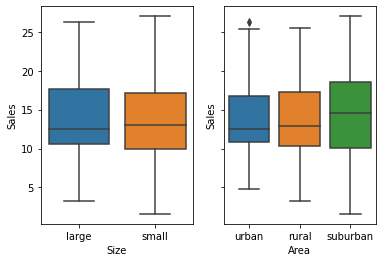

In [17]:
import seaborn as sns
fig, axs = plt.subplots(1, 2, sharey=True)
sns.boxplot(x="Size", y="Sales", data=data, ax=axs[0])
sns.boxplot(x="Area", y="Sales", data=data, ax=axs[1])

**Preparing data for regressors unable to handle categoric data**:<br>
1) binary variables should be maintained (no dummification)<br>
2) nominal variables should be mapped into a compact set of binary variables

In [18]:
dendata = data.copy()
dendata['IsLarge'] = data.Size.map({'small':0, 'large':1})
#del dendata['Size']

# create 3 dummy variables and then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:,1:]
dendata = pd.concat([dendata, area_dummies], axis=1)
del dendata['Area']

dendata.head()

,TV,Radio,Newspaper,Sales,Size,IsLarge,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,0,1
2,44.5,39.3,45.1,10.4,large,1,0,0
3,17.2,45.9,69.3,9.3,small,0,0,1
4,151.5,41.3,58.5,18.5,large,1,1,0
5,180.8,10.8,58.4,12.9,small,0,0,0


Applying **classic regressors**: nominal data needs to be removed or denormalized

In [19]:
# removal of categorical variables
X_rem, y_rem = data[['TV', 'Radio', 'Newspaper']], data.Sales
lm_rem = LinearRegression()
lm_rem.fit(X_rem, y_rem)
print("Intercept:",lm_rem.intercept_,"\nCoefficients:",lm_rem.coef_,"\nR2:",lm_rem.score(X_rem, y_rem))

Intercept: 2.9388893694594014 
Coefficients: [ 0.04576465  0.18853002 -0.00103749] 
R2: 0.8972106381789522


In [20]:
# inclusion of categorical variables
X_all, y_all = dendata[['TV', 'Radio', 'Newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']], dendata.Sales
lm_all = LinearRegression()
print("Accuracy in the absence of categorical vars: ",np.mean(cross_val_score(lm_rem, X_rem, y_rem, cv=10)))
print("Accuracy in the presence of categorical vars:",np.mean(cross_val_score(lm_all, X_all, y_all, cv=10)))

Accuracy in the absence of categorical vars:  0.8853562237979616
Accuracy in the presence of categorical vars: 0.8829428540593209


In [21]:
# estimate sales for two real-valued observations
lm_rem.predict([[100, 25, 25], [50, 50, 50]])

/Users/andreaswichert/miniforge3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([12.20266701, 14.60174784])